<a href="https://colab.research.google.com/github/thejakunam/Machine-Learning/blob/master/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


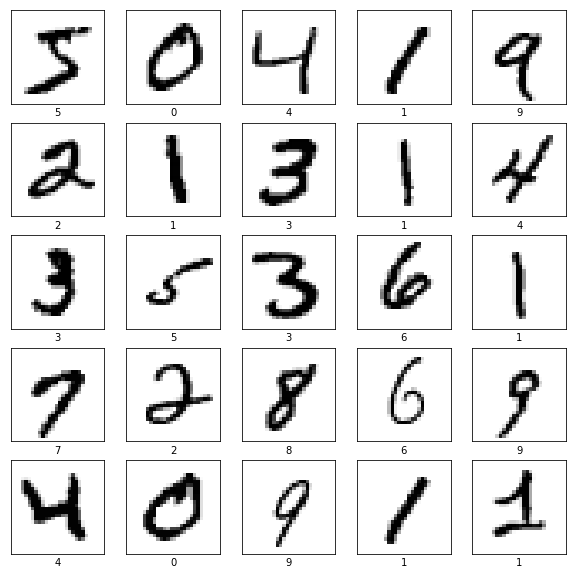

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 11s 182us/sample - loss: 0.2200 - acc: 0.9339
Epoch 2/5
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0960 - acc: 0.9715
Epoch 3/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0687 - acc: 0.9780
Epoch 4/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0541 - acc: 0.9829
Epoch 5/5
10000/10000 [==============================] - 1s 57us/sample - loss: 0.0674 - acc: 0.9798


[0.06736411085586005, 0.9798]

In [19]:
y_pred = model.predict_classes(x_test)
len(y_pred)

10000

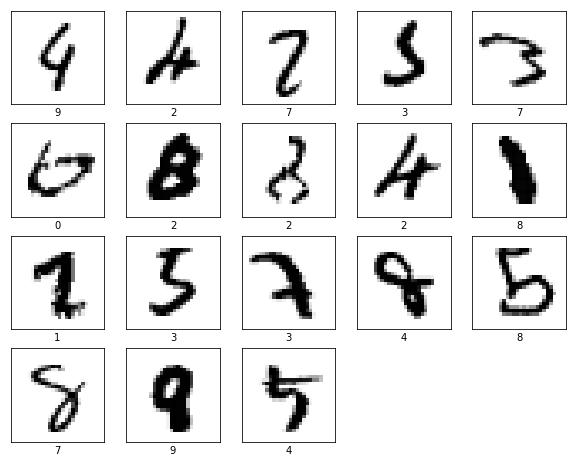

In [20]:
plt.figure(figsize=(10,10))
j = 0
for i in range(1000):
  if y_pred[i] != y_test[i]:   
    #print(j)
    plt.subplot(5,5, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_pred[i])
    j = j + 1
plt.show()